# Spaceship titanic

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_raw_df = pd.read_csv("train.csv")
test_raw_df = pd.read_csv("test.csv")
train_raw_df.shape, test_raw_df.shape

((8693, 14), (4277, 13))

# Data Preprocessing

In [3]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
# change all the bool to numeric 
# train_raw_df = train_raw_df.replace({True: 1, False: 0})
# test_raw_df = test_raw_df.replace({True: 1, False: 0})
# train_raw_df

## Note: 
+ ID: can extract group and family
+ HomePlanet: object with null 
+ CryoSleep: Bynary null
+ Cabin: deck/num/side -> extract the deck and side (object) with null
+ Destination: object will null
+ Age: num with null
+ Vip: binary with null
+ RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: money with null 
+ Name: family with null

In [6]:
# now let concat the train and test data to preprocess them easily
train_label = train_raw_df['Transported']
train_df_nolabel = train_raw_df.drop(['Transported'], axis=1)
raw_df = pd.concat([train_df_nolabel, test_raw_df], axis=0)
raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [7]:
def extract_group_number(df: pd.DataFrame):
    copy_df = df.copy()
    copy_df["PassengerId"] = copy_df["PassengerId"].apply(lambda x: x.split("_")[0])
    group_count = copy_df["PassengerId"].value_counts()
    df["NumberInGroup"] = copy_df["PassengerId"].apply(lambda x: group_count[x])
    return df.drop(["PassengerId"], axis=1)

In [8]:
def extract_cabin_info(df: pd.DataFrame):
    copy_df = df.copy()
    copy_df["Deck"] = copy_df["Cabin"].apply(lambda x: x.split("/")[0] if type(x) == str else np.nan)
    copy_df["Side"] = copy_df["Cabin"].apply(lambda x: x.split("/")[2] if type(x) == str else np.nan)
    return copy_df.drop(["Cabin"], axis=1)

In [9]:
# Extract data and drop useless cols
df_1 = extract_group_number(raw_df)
df_2 = df_1.drop(["Name"], axis=1)
df_3 = extract_cabin_info(df_2)
numerical_cols = df_3.select_dtypes(include=[np.number]).columns
category_cols = df_3.select_dtypes(include=["object"]).columns
numerical_cols, category_cols

(Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'NumberInGroup'],
       dtype='object'),
 Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'], dtype='object'))

In [10]:
df_3[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            12700 non-null  float64
 1   RoomService    12707 non-null  float64
 2   FoodCourt      12681 non-null  float64
 3   ShoppingMall   12664 non-null  float64
 4   Spa            12686 non-null  float64
 5   VRDeck         12702 non-null  float64
 6   NumberInGroup  12970 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 810.6 KB


In [11]:
# fill nan with mean in numerical columns
# fill nan with mode in category columns
df_3[numerical_cols] = df_3[numerical_cols].fillna(df_3[numerical_cols].mean())
df_3[category_cols] = df_3[category_cols].fillna(df_3[category_cols].mode().iloc[0])
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     12970 non-null  object 
 1   CryoSleep      12970 non-null  bool   
 2   Destination    12970 non-null  object 
 3   Age            12970 non-null  float64
 4   VIP            12970 non-null  bool   
 5   RoomService    12970 non-null  float64
 6   FoodCourt      12970 non-null  float64
 7   ShoppingMall   12970 non-null  float64
 8   Spa            12970 non-null  float64
 9   VRDeck         12970 non-null  float64
 10  NumberInGroup  12970 non-null  int64  
 11  Deck           12970 non-null  object 
 12  Side           12970 non-null  object 
dtypes: bool(2), float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [12]:
train_label.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [13]:
df_encoded = pd.get_dummies(df_3, columns=category_cols)

# Feature selection

In [14]:
# let normalize the numerical columns with log1p
df_encoded["SumConsumption"] = df_encoded["RoomService"] + df_encoded["FoodCourt"] + df_encoded["ShoppingMall"]+df_encoded["Spa"]
df_encoded["SumConsumption"] = df_encoded["SumConsumption"].apply(lambda x: np.log1p(x))
df_encoded["RoomService"] = df_encoded["RoomService"].apply(lambda x: np.log1p(x))
df_encoded["FoodCourt"] = df_encoded["FoodCourt"].apply(lambda x: np.log1p(x))
df_encoded["ShoppingMall"] = df_encoded["ShoppingMall"].apply(lambda x: np.log1p(x))
df_encoded["Spa"] = df_encoded["Spa"].apply(lambda x: np.log1p(x))
df_encoded["VRDeck"] = df_encoded["VRDeck"].apply(lambda x: np.log1p(x))

In [15]:
df_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NumberInGroup,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,SumConsumption
0,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,False,True,False,...,True,False,False,False,False,False,False,True,False,0.000000
1,24.0,4.700480,2.302585,3.258097,6.309918,3.806662,1,True,False,False,...,False,False,False,False,True,False,False,False,True,6.541030
2,58.0,3.784190,8.182280,0.000000,8.812248,3.912023,2,False,True,False,...,False,False,False,False,False,False,False,False,True,9.243291
3,33.0,0.000000,7.157735,5.918894,8.110728,5.267858,2,False,True,False,...,False,False,False,False,False,False,False,False,True,8.513988
4,16.0,5.717028,4.262680,5.023881,6.338594,1.098612,1,True,False,False,...,False,False,False,False,True,False,False,False,True,6.993933


C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_15736\796511901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded["SumConsumption"],fit=norm)
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SumConsumption', ylabel='Density'>

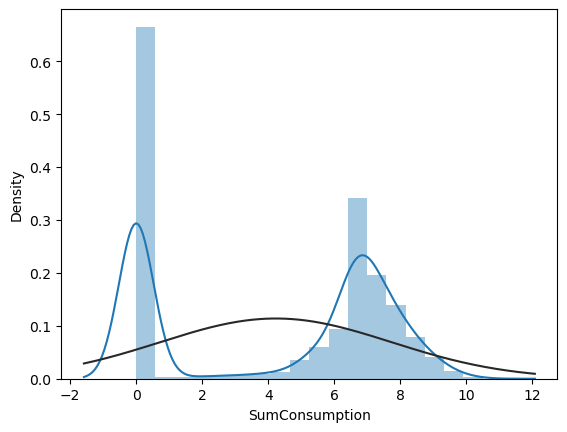

In [16]:
from scipy.stats import norm

sns.distplot(df_encoded["SumConsumption"],fit=norm)


In [17]:
train_df = df_encoded.iloc[:train_raw_df.shape[0], :]
train_df = pd.concat([train_df, train_label], axis=1)
test_df = df_encoded.iloc[train_raw_df.shape[0]:, :]
train_df.shape, test_df.shape

((8693, 29), (4277, 28))

In [18]:
train_df.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'NumberInGroup', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P',
       'Side_S', 'SumConsumption', 'Transported'],
      dtype='object')

<Axes: xlabel='Transported', ylabel='Age'>

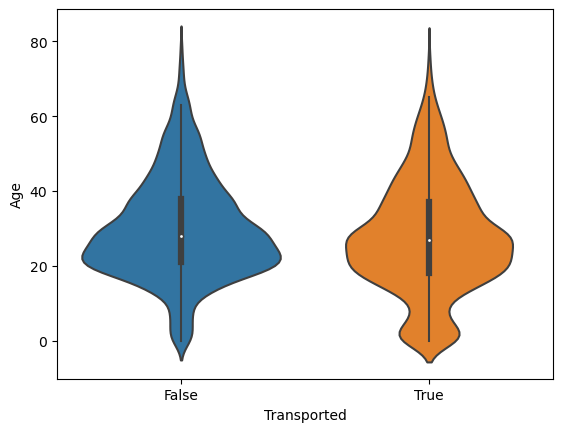

In [19]:
sns.violinplot(x="Transported", y="Age", data=train_df)

d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


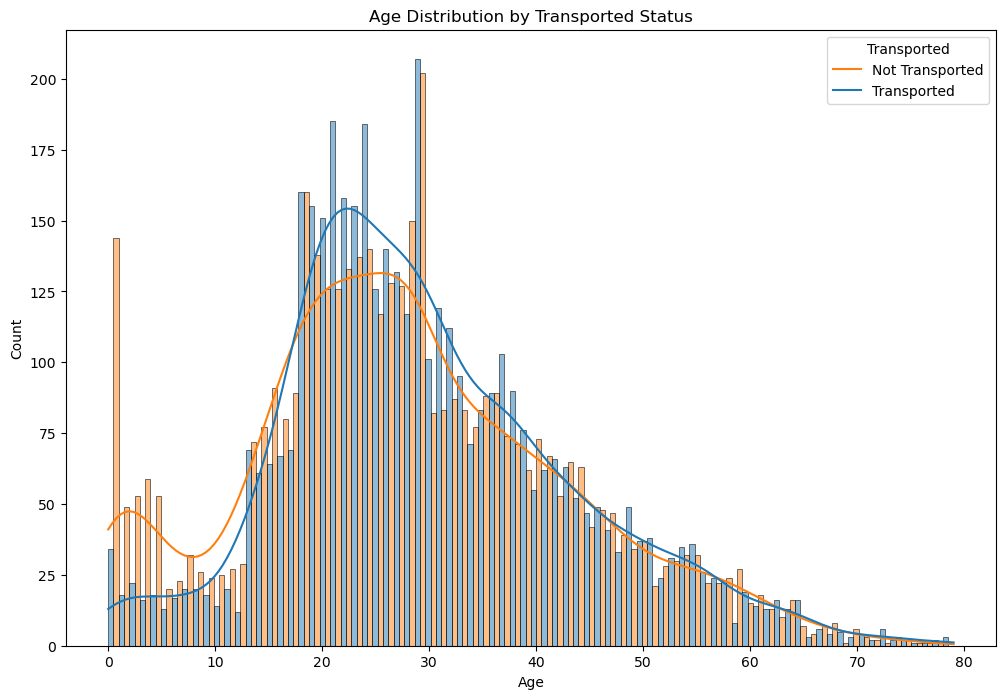

In [20]:
# Histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=train_df, x='Age', hue='Transported', multiple="dodge",bins=80, kde=True)
plt.title('Age Distribution by Transported Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


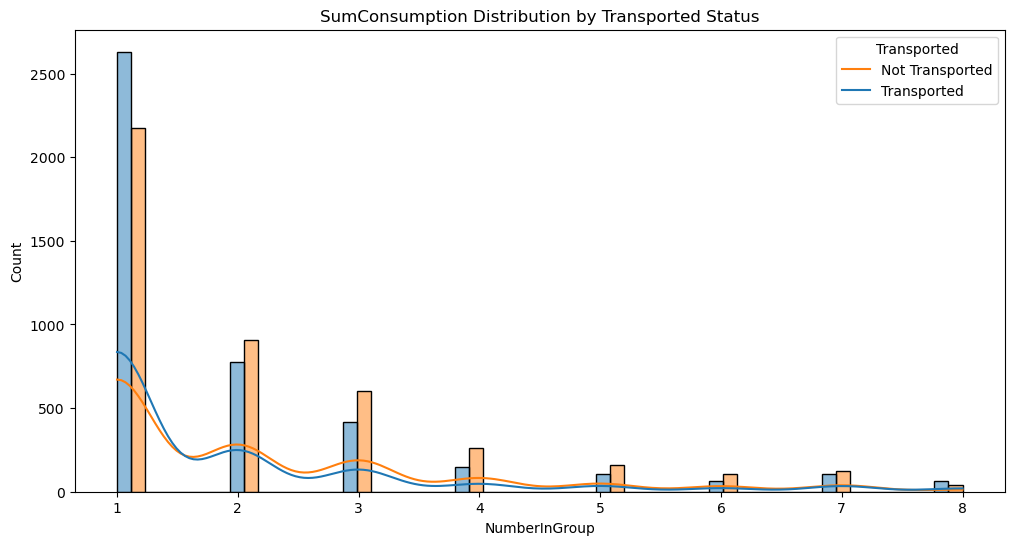

In [21]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='NumberInGroup', hue='Transported', multiple="dodge",bins=30, kde=True)
plt.title('SumConsumption Distribution by Transported Status')
plt.xlabel('NumberInGroup')
plt.ylabel('Count')
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

## Note 2: 
+ we clearly see that the numer in group should be divided into 2 group: 1+8 and other
+ also the age should be divided into 0-17,18-43,44-56,57-63,63-inf

now let change the age and number in group to categorical data 

In [22]:
bins = [0, 17, 43, 56, 63, float('inf')]
labels = ['0-17', '18-43', '44-56', '57-63', '64+']

# Create a new column 'AgeGroup' with categorized age groups
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels, right=False)

# Display the dataframe to see the new column


In [23]:
def categorize_number_in_group(value):
    if value in [1, 8]:
        return '1+8'
    else:
        return 'Other'

# Apply the function to create a new column 'NumberGroup'
df_encoded['NumberGroup'] = df_encoded['NumberInGroup'].apply(categorize_number_in_group)

In [24]:
df_encoded.drop(['Age', 'NumberInGroup'], axis=1, inplace=True)

In [25]:
df_encoded = pd.get_dummies(df_encoded, columns=['AgeGroup', 'NumberGroup'])

In [123]:
train_df = df_encoded.iloc[:train_raw_df.shape[0], :]
train_df = pd.concat([train_df, train_label], axis=1)
test_df = df_encoded.iloc[train_raw_df.shape[0]:, :]
train_df.shape, test_df.shape

((8693, 34), (4277, 33))

In [27]:
train_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,...,Side_S,SumConsumption,AgeGroup_0-17,AgeGroup_18-43,AgeGroup_44-56,AgeGroup_57-63,AgeGroup_64+,NumberGroup_1+8,NumberGroup_Other,Transported
0,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,True,False,...,False,0.000000,False,True,False,False,False,True,False,False
1,4.700480,2.302585,3.258097,6.309918,3.806662,True,False,False,True,False,...,True,6.541030,False,True,False,False,False,True,False,True
2,3.784190,8.182280,0.000000,8.812248,3.912023,False,True,False,True,False,...,True,9.243291,False,False,False,True,False,False,True,False
3,0.000000,7.157735,5.918894,8.110728,5.267858,False,True,False,True,False,...,True,8.513988,False,True,False,False,False,False,True,False
4,5.717028,4.262680,5.023881,6.338594,1.098612,True,False,False,True,False,...,True,6.993933,True,False,False,False,False,True,False,True


# Model selection

Scaler and change the df to X and y

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = train_df.drop(["Transported"], axis=1)
y = train_df["Transported"]
# X_scaled = scaler.fit_transform(X)
X_scaled = X
X_test = test_df
X.shape, y.shape, X_test.shape


((8693, 33), (8693,), (4277, 33))

choosing importance features based on ExtraTrees

In [29]:
X_df = pd.DataFrame(X_scaled, columns=test_df.columns)
from sklearn.ensemble import ExtraTreesClassifier
extra_reg = ExtraTreesClassifier()
extra_reg.fit(X_df, y)
feat_importances = {"feat_name":X_df.columns, "importance":extra_reg.feature_importances_}
feat_importances = pd.DataFrame(feat_importances).sort_values(by='importance', ascending=False).reset_index(drop=True)
feat_importances['accumulate_importance'] = feat_importances.importance.cumsum()
display(feat_importances)

,feat_name,importance,accumulate_importance
0,SumConsumption,0.112798,0.112798
1,Spa,0.106319,0.219117
2,RoomService,0.095982,0.315099
3,VRDeck,0.093177,0.408277
4,CryoSleep_True,0.089765,0.498042
5,FoodCourt,0.078917,0.576959
6,ShoppingMall,0.073321,0.650280
7,CryoSleep_False,0.071957,0.722237
8,HomePlanet_Earth,0.025736,0.747973
9,HomePlanet_Europa,0.020680,0.768654


choosing the 90% important feature 

In [30]:
over_90_index = feat_importances[feat_importances['accumulate_importance']>0.9].index[0]
top_fts = feat_importances.loc[:over_90_index, 'feat_name'].to_list()
top_fts

['SumConsumption',
 'Spa',
 'RoomService',
 'VRDeck',
 'CryoSleep_True',
 'FoodCourt',
 'ShoppingMall',
 'CryoSleep_False',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'AgeGroup_18-43',
 'Destination_TRAPPIST-1e',
 'AgeGroup_0-17',
 'Destination_55 Cancri e',
 'NumberGroup_Other',
 'Side_S']

In [36]:
selected_X = X_df
X_test = X_test

evaluate a model based on f1 and auc with CV 

In [32]:
def evaluate_model(X: np.ndarray, y: np.ndarray, model, model_name):
    from sklearn.model_selection import cross_val_score
    acc_scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(f"{model_name} acc score: {acc_scores.mean()}")
    # auc_scores = cross_val_score(model, X, y, scoring="roc_auc", cv=5)
    # print(f"{model_name} auc score: {auc_scores.mean()}")

In [33]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
sgd_clf = SGDClassifier()
lr_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
lasso_clf =  LogisticRegression(penalty='l1', solver='liblinear')
svc_rbf_clf = SVC(kernel="rbf", C=5, gamma="scale",)
svc_poly_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, gamma="scale")
svc_linear_clf = SVC(kernel="linear", C=5, gamma="scale")
svc_sigmoid_clf = SVC(kernel="sigmoid", C=5, gamma="scale")
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, max_samples=0.8, max_features=0.8, n_jobs=-1)
gb_clf = GradientBoostingClassifier(n_estimators=200, max_depth=10, max_features=0.8)
nb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(n_neighbors=5)


In [37]:
evaluate_model(selected_X, y, sgd_clf, "SGD")
evaluate_model(selected_X, y, lr_clf, "Logistic Regression")
evaluate_model(selected_X, y, ridge_clf, "Ridge")
evaluate_model(selected_X, y, lasso_clf, "Lasso")


SGD acc score: 0.7554367383077321


d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Logistic Regression acc score: 0.7732660530667533
Ridge acc score: 0.7766026266699576
Lasso acc score: 0.7729210933627847


In [38]:
evaluate_model(selected_X, y, svc_rbf_clf, "SVC RBF")
evaluate_model(selected_X, y, svc_poly_clf, "SVC Poly")

SVC RBF acc score: 0.7990358597953534
SVC Poly acc score: 0.7991515301507222


In [39]:
evaluate_model(selected_X, y, svc_linear_clf, "SVC Linear")
evaluate_model(selected_X, y, svc_sigmoid_clf, "SVC Sigmoid")

SVC Linear acc score: 0.7756832855674762
SVC Sigmoid acc score: 0.6336123626993543


In [40]:
evaluate_model(selected_X, y, rf_clf, "Random Forest")
evaluate_model(selected_X, y, gb_clf, "Gradient Boosting")

Random Forest acc score: 0.7970810440242166
Gradient Boosting acc score: 0.7937446027669567


In [41]:
evaluate_model(selected_X, y, nb_clf, "Naive Bayes")
evaluate_model(selected_X, y, knn_clf, "KNN")

Naive Bayes acc score: 0.7313985459151093
KNN acc score: 0.7591168158095172


# Fine tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(selected_X, y, test_size=0.2)

In [44]:
param_grid = {
    'loss': ['hinge'],
    'penalty': ['l2'],
    'alpha': [ 0.01, 0.1],
    'fit_intercept': [True, False],
    'max_iter': [3000],
}

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'alpha': 0.01,
  'fit_intercept': True,
  'loss': 'hinge',
  'max_iter': 3000,
  'penalty': 'l2'},
 0.7719292057367765)

Alpha: 0.0001, Train Accuracy: 0.5340811044003452, Validation Accuracy: 0.5094882116158712
Alpha: 0.0011, Train Accuracy: 0.7379925222893299, Validation Accuracy: 0.7400805060379528
Alpha: 0.0021, Train Accuracy: 0.7428817946505608, Validation Accuracy: 0.7475560667050029
Alpha: 0.0031, Train Accuracy: 0.7733678458441184, Validation Accuracy: 0.7699827487061529
Alpha: 0.0041, Train Accuracy: 0.7598504457865977, Validation Accuracy: 0.7613571017826337
Alpha: 0.0051, Train Accuracy: 0.7681909692263446, Validation Accuracy: 0.7705577918343876
Alpha: 0.0061, Train Accuracy: 0.7272073626689675, Validation Accuracy: 0.723404255319149
Alpha: 0.0071, Train Accuracy: 0.7650273224043715, Validation Accuracy: 0.7699827487061529
Alpha: 0.0081, Train Accuracy: 0.7601380500431406, Validation Accuracy: 0.7446808510638298
Alpha: 0.0091, Train Accuracy: 0.772936439459304, Validation Accuracy: 0.7694077055779184
Alpha: 0.0101, Train Accuracy: 0.7759562841530054, Validation Accuracy: 0.7751581368602645
A

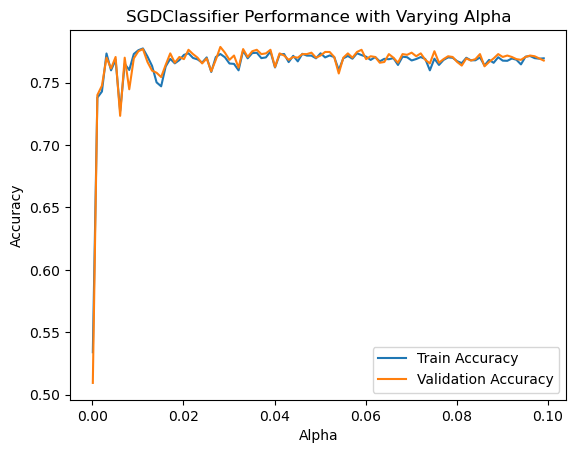

In [51]:
alpha_range = np.arange(0.0001, 0.1, 0.001)  # Example range of alpha values
train_accuracy = []
val_accuracy = []

for C in alpha_range:
    sgd_clf = SGDClassifier(alpha=C,
                            fit_intercept=True,
                            loss='hinge',
                            max_iter=3000,
                            penalty='l2',
                            early_stopping=True,
                            # validation_fraction=0.1,  # Use part of the training set as validation
                            # n_iter_no_change=10
                            )  # Early stopping parameters
    sgd_clf.fit(X_train, y_train)
    
    y_train_pred = sgd_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = sgd_clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"Alpha: {C}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(alpha_range, train_accuracy, label='Train Accuracy')
plt.plot(alpha_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('SGDClassifier Performance with Varying Alpha')
# plt.xscale('log')  # Use log scale for better visualization if alpha range is wide
plt.legend()
plt.show()

In [52]:
sgd_clf = SGDClassifier(alpha=0.011,
                            fit_intercept=True,
                            loss='hinge',
                            max_iter=3000,
                            penalty='l2',
                            early_stopping=True,
                            ) 
evaluate_model(selected_X, y, sgd_clf, "SGD")

SGD acc score: 0.7683229320449897


In [53]:
param_grid = {
    'loss': ['hinge'],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.3, 0.5],
    'alpha': [ 0.001, 0.01],
    'fit_intercept': [True, False],
    'max_iter': [3000],
}

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'alpha': 0.01,
  'fit_intercept': False,
  'l1_ratio': 0.5,
  'loss': 'hinge',
  'max_iter': 3000,
  'penalty': 'elasticnet'},
 0.7687663241082189)

Alpha: 0.05, Train Accuracy: 0.7686223756111591, Validation Accuracy: 0.7682576193214491
Alpha: 0.060000000000000005, Train Accuracy: 0.7713546160483176, Validation Accuracy: 0.7751581368602645
Alpha: 0.07, Train Accuracy: 0.7719298245614035, Validation Accuracy: 0.7745830937320299
Alpha: 0.08000000000000002, Train Accuracy: 0.7733678458441184, Validation Accuracy: 0.7745830937320299
Alpha: 0.09000000000000001, Train Accuracy: 0.769772792637331, Validation Accuracy: 0.7740080506037953
Alpha: 0.1, Train Accuracy: 0.774374460742019, Validation Accuracy: 0.772857964347326
Alpha: 0.11000000000000001, Train Accuracy: 0.7571182053494392, Validation Accuracy: 0.7625071880391029
Alpha: 0.12000000000000001, Train Accuracy: 0.770348001150417, Validation Accuracy: 0.7676825761932144
Alpha: 0.13, Train Accuracy: 0.7549611734253667, Validation Accuracy: 0.753306497987349
Alpha: 0.14, Train Accuracy: 0.7680471670980731, Validation Accuracy: 0.7711328349626222
Alpha: 0.15000000000000002, Train Accura

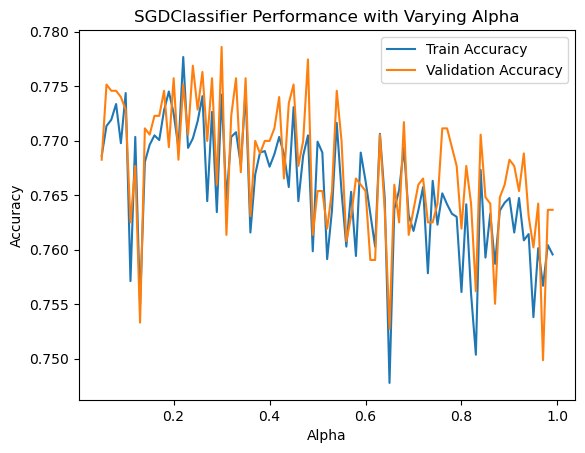

In [57]:
alpha_range = np.arange(0.05,1,0.01)  # Example range of alpha values
train_accuracy = []
val_accuracy = []

for C in alpha_range:
    sgd_clf = SGDClassifier(alpha=0.02,
                            fit_intercept=True,
                            loss='hinge',
                            l1_ratio=C,
                            max_iter=3000,
                            penalty='elasticnet',
                            early_stopping=True,
                            # validation_fraction=0.1,  # Use part of the training set as validation
                            # n_iter_no_change=10
                            )  # Early stopping parameters
    sgd_clf.fit(X_train, y_train)
    
    y_train_pred = sgd_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = sgd_clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"Alpha: {C}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(alpha_range, train_accuracy, label='Train Accuracy')
plt.plot(alpha_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('SGDClassifier Performance with Varying Alpha')
# plt.xscale('log')  # Use log scale for better visualization if alpha range is wide
plt.legend()
plt.show()


In [59]:
sgd_clf = SGDClassifier(alpha=0.02,
                            fit_intercept=True,
                            loss='hinge',
                            max_iter=3000,
                            penalty='elasticnet',
                            l1_ratio=0.22,
                            early_stopping=True,
                            ) 
evaluate_model(selected_X, y, sgd_clf, "SGD for elasticnet")

SGD for elasticnet acc score: 0.7700466056243057


In [60]:
# # grid search for logistic regression
# parma_grid = {
#     'penalty': ['l2'],
#     'C': [0.1, 1, 10],
#     'max_iter': [300],
#     'fit_intercept': [True, False],
#     'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
# }
# grid_search = GridSearchCV(lr_clf, parma_grid, cv=5, scoring='accuracy', return_train_score=True)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_, grid_search.best_score_

d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\DownloadDiskD\conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached 

KeyboardInterrupt: 

Alpha: 0.001, Train Accuracy: 0.7522289329882083, Validation Accuracy: 0.7492811960897068
Alpha: 0.01, Train Accuracy: 0.770923209663503, Validation Accuracy: 0.7550316273720529
Alpha: 0.1, Train Accuracy: 0.7811331607707794, Validation Accuracy: 0.7642323174238068
Alpha: 1, Train Accuracy: 0.7814207650273224, Validation Accuracy: 0.7648073605520413
Alpha: 10, Train Accuracy: 0.7814207650273224, Validation Accuracy: 0.7648073605520413
Alpha: 100, Train Accuracy: 0.7814207650273224, Validation Accuracy: 0.7642323174238068
Alpha: 1000, Train Accuracy: 0.7814207650273224, Validation Accuracy: 0.7642323174238068


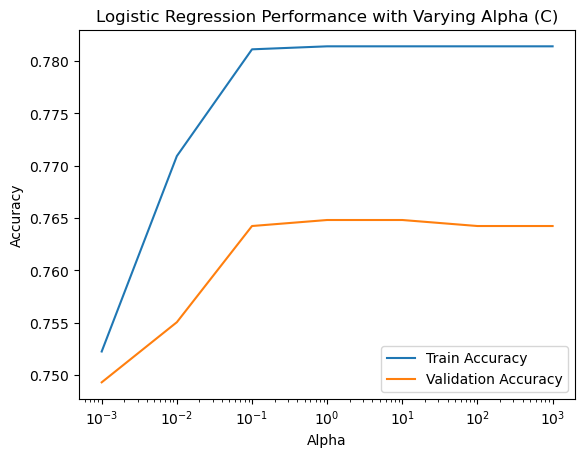

In [ ]:
# C_range = [0.001,0.01, 0.1, 1, 10, 100,1000]  # Example range of alpha values
# train_accuracy = []
# val_accuracy = []
# for C in C_range:
#     log_reg = LogisticRegression(C=C,
#                                  fit_intercept=True,
#                                  penalty='l2',
#                                  solver='liblinear',
#                                  max_iter=300)

#     log_reg.fit(X_train, y_train)
    
#     y_train_pred = log_reg.predict(X_train)
#     train_acc = accuracy_score(y_train, y_train_pred)
#     train_accuracy.append(train_acc)
    
#     y_val_pred = log_reg.predict(X_val)
#     val_acc = accuracy_score(y_val, y_val_pred)
#     val_accuracy.append(val_acc)
#     print(f"Alpha: {C}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")
# plt.plot(C_range, train_accuracy, label='Train Accuracy')
# plt.plot(C_range, val_accuracy, label='Validation Accuracy')
# plt.xlabel('Alpha')
# plt.ylabel('Accuracy')
# plt.title('Logistic Regression Performance with Varying Alpha (C)')
# plt.xscale('log')  # Use log scale for better visualization if alpha range is wide
# plt.legend()
# plt.show()


In [64]:
log_reg = LogisticRegression(C=1,
                                 fit_intercept=True,
                                 penalty='l2',
                                 solver='liblinear',
                                 max_iter=300)

evaluate_model(selected_X, y, log_reg, "Logistic Regression")

Logistic Regression acc score: 0.773380995519428


In [65]:
# grid_search for ridge 
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [300],
    'solver': ['auto', 'svd', 'cholesky'],
}

grid_search = GridSearchCV(ridge_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_


({'alpha': 0.01, 'fit_intercept': True, 'max_iter': 300, 'solver': 'auto'},
 0.7786875546291938)

Alpha: 10, Train Accuracy: 0.7815645671555939, Validation Accuracy: 0.7786083956296722
Alpha: 12, Train Accuracy: 0.7815645671555939, Validation Accuracy: 0.7786083956296722
Alpha: 14, Train Accuracy: 0.7815645671555939, Validation Accuracy: 0.7786083956296722
Alpha: 16, Train Accuracy: 0.7815645671555939, Validation Accuracy: 0.7791834387579069
Alpha: 18, Train Accuracy: 0.7814207650273224, Validation Accuracy: 0.7791834387579069
Alpha: 20, Train Accuracy: 0.7815645671555939, Validation Accuracy: 0.7791834387579069
Alpha: 22, Train Accuracy: 0.780989358642508, Validation Accuracy: 0.7797584818861415
Alpha: 24, Train Accuracy: 0.780989358642508, Validation Accuracy: 0.7797584818861415
Alpha: 26, Train Accuracy: 0.7799827437446074, Validation Accuracy: 0.7780333525014376
Alpha: 28, Train Accuracy: 0.7798389416163359, Validation Accuracy: 0.7780333525014376
Alpha: 30, Train Accuracy: 0.7796951394880645, Validation Accuracy: 0.777458309373203
Alpha: 32, Train Accuracy: 0.7795513373597929,

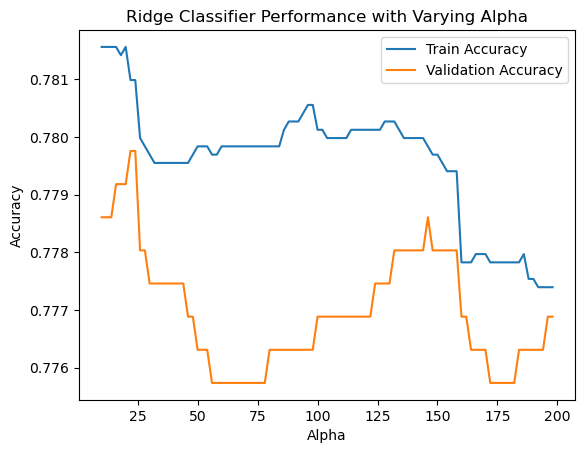

In [68]:
alpha_range = np.arange(10,200,2)  # Example range of alpha values
train_accuracy = []
val_accuracy = []

for alpha in alpha_range:
    ridge_clf = RidgeClassifier(alpha=alpha,
                                fit_intercept=True,
                                max_iter=300,
                                solver='auto')

    ridge_clf.fit(X_train, y_train)
    
    y_train_pred = ridge_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = ridge_clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"Alpha: {alpha}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(alpha_range, train_accuracy, label='Train Accuracy')
plt.plot(alpha_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Ridge Classifier Performance with Varying Alpha')
# plt.xscale('log')  # Use log scale for better visualization if alpha range is wide
plt.legend()
plt.show()

In [69]:
ridge_clf = RidgeClassifier(alpha=24,
                                fit_intercept=True,
                                max_iter=300,
                                solver='auto')
evaluate_model(selected_X, y, ridge_clf, "Ridge Classifier")

Ridge Classifier acc score: 0.7764872871794497


In [70]:
# grid search for LogisticRegression(penalty='l1', solver='liblinear') 

param_grid = {
    'C': [0.01,0.1,1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [300],
    'penalty': ['l1'],
    'solver': ['liblinear'],
}

grid_search = GridSearchCV(lasso_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'C': 0.1,
  'fit_intercept': True,
  'max_iter': 300,
  'penalty': 'l1',
  'solver': 'liblinear'},
 0.7776806707042704)

Alpha: 0.01, Train Accuracy: 0.7730802415875755, Validation Accuracy: 0.7763082231167338
Alpha: 0.015, Train Accuracy: 0.776962899050906, Validation Accuracy: 0.7768832662449684
Alpha: 0.019999999999999997, Train Accuracy: 0.7771067011791775, Validation Accuracy: 0.777458309373203
Alpha: 0.024999999999999998, Train Accuracy: 0.7776819096922635, Validation Accuracy: 0.7751581368602645
Alpha: 0.03, Train Accuracy: 0.778976128846707, Validation Accuracy: 0.777458309373203
Alpha: 0.034999999999999996, Train Accuracy: 0.7795513373597929, Validation Accuracy: 0.777458309373203
Alpha: 0.039999999999999994, Train Accuracy: 0.7795513373597929, Validation Accuracy: 0.7780333525014376
Alpha: 0.045, Train Accuracy: 0.7796951394880645, Validation Accuracy: 0.7786083956296722
Alpha: 0.049999999999999996, Train Accuracy: 0.7798389416163359, Validation Accuracy: 0.7786083956296722
Alpha: 0.05499999999999999, Train Accuracy: 0.7798389416163359, Validation Accuracy: 0.7786083956296722
Alpha: 0.059999999

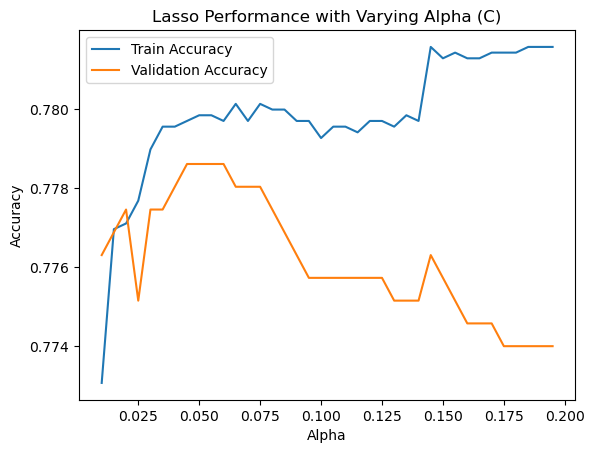

In [72]:
C_range = np.arange(0.01,0.2,0.005)  # Example range of alpha values
train_accuracy = []
val_accuracy = []
for C in C_range:
    log_reg = LogisticRegression(C=C,
                                 fit_intercept=True,
                                 penalty='l1',
                                 solver='liblinear',
                                 max_iter=300)

    log_reg.fit(X_train, y_train)
    
    y_train_pred = log_reg.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = log_reg.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    print(f"Alpha: {C}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")
plt.plot(C_range, train_accuracy, label='Train Accuracy')
plt.plot(C_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Lasso Performance with Varying Alpha (C)')
# plt.xscale('log')  # Use log scale for better visualization if alpha range is wide
plt.legend()
plt.show()


In [73]:
lasso_clf = LogisticRegression(C=0.06,
                                 fit_intercept=True,
                                 penalty='l1',
                                 solver='liblinear',
                                 max_iter=300)

evaluate_model(selected_X, y, lasso_clf, "Lasso")

Lasso acc score: 0.7745311479488695


In [74]:
# param grid for rbf svc 
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'],
}
grid_search = GridSearchCV(svc_rbf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.7993956007013225)

C: 0.1, Train Accuracy: 0.7761000862812769, Validation Accuracy: 0.780333525014376
C: 0.30000000000000004, Train Accuracy: 0.7950819672131147, Validation Accuracy: 0.7947096032202415
C: 0.5000000000000001, Train Accuracy: 0.7979580097785447, Validation Accuracy: 0.7975848188614146
C: 0.7000000000000001, Train Accuracy: 0.8005464480874317, Validation Accuracy: 0.79700977573318
C: 0.9000000000000001, Train Accuracy: 0.8006902502157032, Validation Accuracy: 0.7975848188614146
C: 1.1000000000000003, Train Accuracy: 0.8014092608570607, Validation Accuracy: 0.7958596894767107
C: 1.3000000000000003, Train Accuracy: 0.8014092608570607, Validation Accuracy: 0.79700977573318
C: 1.5000000000000004, Train Accuracy: 0.8018406672418752, Validation Accuracy: 0.7975848188614146
C: 1.7000000000000004, Train Accuracy: 0.8018406672418752, Validation Accuracy: 0.7964347326049454
C: 1.9000000000000004, Train Accuracy: 0.8022720736266897, Validation Accuracy: 0.7981598619896493


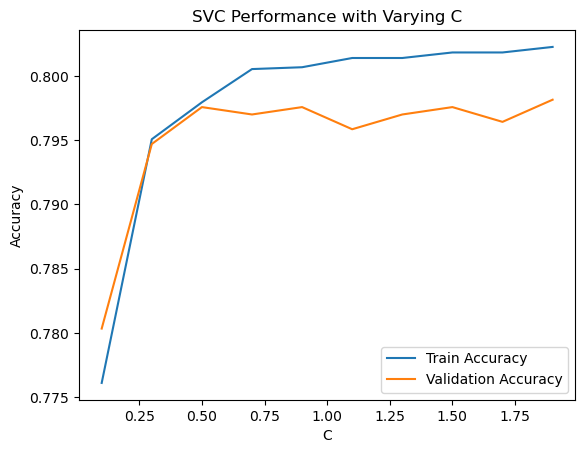

In [76]:
C_range = np.arange(0.1, 2, 0.2)  # Example range of C values
train_accuracy = []
val_accuracy = []

for C in C_range:
    svc = SVC(C=C,
              kernel='rbf',
              gamma='scale')

    svc.fit(X_train, y_train)
    
    y_train_pred = svc.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = svc.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"C: {C}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(C_range, train_accuracy, label='Train Accuracy')
plt.plot(C_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVC Performance with Varying C')
plt.legend()
plt.show()

In [77]:
svc_rbf_clf = SVC(C=0.5,
              kernel='rbf',
              gamma='scale')

evaluate_model(selected_X, y, svc_rbf_clf, "SVC RBF")

SVC RBF acc score: 0.7937445365939844


In [78]:
param_grid = {
    'C': [ 0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly'],
    'degree': [3],
    'coef0': [0, 1],
}
grid_search = GridSearchCV(svc_poly_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'C': 1, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'},
 0.8009771966754418)

C: 0.01, Train Accuracy: 0.7842968075927523, Validation Accuracy: 0.7883841288096607
C: 0.02, Train Accuracy: 0.7894736842105263, Validation Accuracy: 0.7958596894767107
C: 0.03, Train Accuracy: 0.7940753523152143, Validation Accuracy: 0.7993099482461185
C: 0.04, Train Accuracy: 0.7966637906241012, Validation Accuracy: 0.7975848188614146
C: 0.05, Train Accuracy: 0.7979580097785447, Validation Accuracy: 0.7998849913743531
C: 0.060000000000000005, Train Accuracy: 0.7999712395743457, Validation Accuracy: 0.8004600345025877
C: 0.06999999999999999, Train Accuracy: 0.8002588438308887, Validation Accuracy: 0.8004600345025877
C: 0.08, Train Accuracy: 0.8011216566005177, Validation Accuracy: 0.7998849913743531
C: 0.09, Train Accuracy: 0.8009778544722462, Validation Accuracy: 0.8004600345025877
C: 0.09999999999999999, Train Accuracy: 0.8016968651136037, Validation Accuracy: 0.8004600345025877
C: 0.11, Train Accuracy: 0.8019844693701467, Validation Accuracy: 0.8004600345025877
C: 0.12, Train Accu

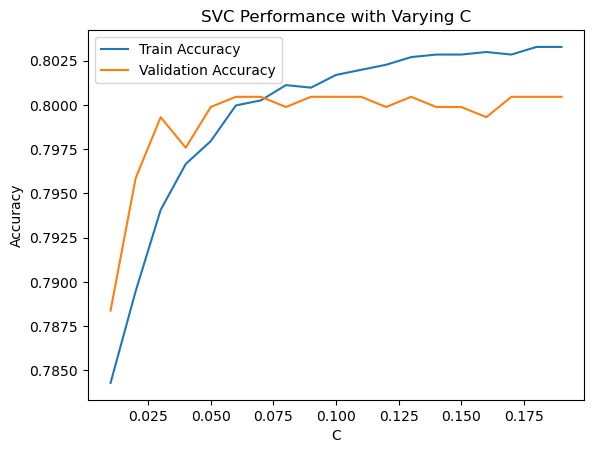

In [81]:
C_range = np.arange(0.01, 0.2, 0.01)  # Example range of C values
train_accuracy = []
val_accuracy = []

for C in C_range:
    svc = SVC(C=C,
              kernel='poly',
              degree=3,
              coef0=1,
              gamma='scale')

    svc.fit(X_train, y_train)
    
    y_train_pred = svc.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = svc.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"C: {C}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(C_range, train_accuracy, label='Train Accuracy')
plt.plot(C_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVC Performance with Varying C')
plt.legend()
plt.show()

In [83]:
svc_poly_clf = SVC(C=0.09,
              kernel='poly',
              degree=3,
              coef0=1,
              gamma='scale')
evaluate_model(selected_X, y, svc_poly_clf, "SVC Poly")

SVC Poly acc score: 0.7971952585741975


In [ ]:
# param_grid =  {
#     'C': [0.1, 1],
#     'gamma': ['scale'],
#     'kernel': ['linear'],
#     # 'coef0': [0, 1, 2],
#     'shrinking': [False,True],
# }
# grid_search = GridSearchCV(svc_linear_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_, grid_search.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True},
 0.7881816818292311)

C: 0.1, Train Accuracy: 0.7785447224618924, Validation Accuracy: 0.765382403680276
C: 0.2, Train Accuracy: 0.7791199309749784, Validation Accuracy: 0.7636572742955722
C: 0.30000000000000004, Train Accuracy: 0.7795513373597929, Validation Accuracy: 0.7630822311673375
C: 0.4, Train Accuracy: 0.7794075352315214, Validation Accuracy: 0.7630822311673375
C: 0.5, Train Accuracy: 0.7796951394880645, Validation Accuracy: 0.7636572742955722
C: 0.6, Train Accuracy: 0.7798389416163359, Validation Accuracy: 0.7636572742955722
C: 0.7000000000000001, Train Accuracy: 0.7796951394880645, Validation Accuracy: 0.7625071880391029
C: 0.8, Train Accuracy: 0.7796951394880645, Validation Accuracy: 0.7625071880391029
C: 0.9, Train Accuracy: 0.7798389416163359, Validation Accuracy: 0.7625071880391029


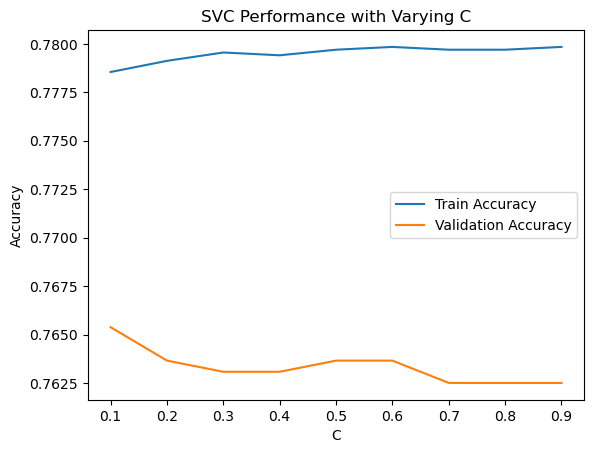

In [ ]:
C_range = np.arange(0.1, 1, 0.1)  # Example range of C values
train_accuracy = []
val_accuracy = []

for C in C_range:
    svc = SVC(C=C,
              kernel='linear',
            #   coef0=1,
              gamma='scale',
              shrinking=True)

    svc.fit(X_train, y_train)
    
    y_train_pred = svc.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = svc.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"C: {C}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(C_range, train_accuracy, label='Train Accuracy')
plt.plot(C_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVC Performance with Varying C')
plt.legend()
plt.show()

In [ ]:
svc_linear_clf = SVC(C=0.7,
                kernel='linear',
            #   coef0=1,
              gamma='scale',
              shrinking=True)   

evaluate_model(selected_X, y, svc_linear_clf, "SVC Linear")

SVC Linear acc score: 0.7752225893351667


In [ ]:
# param_grid = {
#     'var_smoothing': np.logspace(0, -9, num=100)  # Explore a wide range of values
# }
# grid_search = GridSearchCV(nb_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_, grid_search.best_score_

({'var_smoothing': 0.12328467394420659}, 0.7781156354571268)

Var Smoothing: 1e-09, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 1.5264179671752366e-09, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 2.3299518105153718e-09, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 3.556480306223136e-09, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 5.4286754393238595e-09, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 8.28642772854686e-09, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 1.2648552168552958e-08, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 1.9306977288832496e-08, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.7354801610120759
Var Smoothing: 2.9470517025518096e-08, Train Accuracy: 0.7354040839804429, Validation Accuracy: 0.73

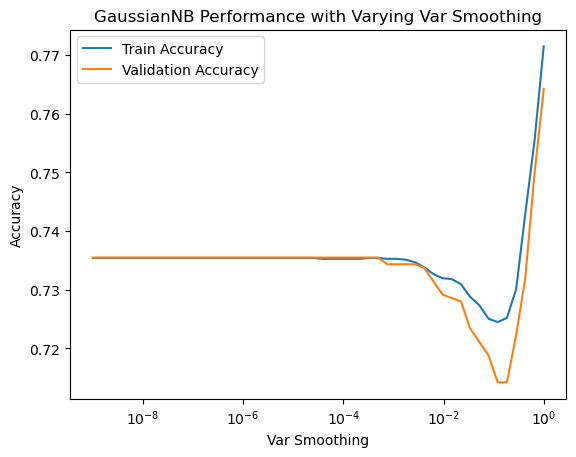

In [ ]:
var_smoothing_range = np.logspace(-9, 0, 50)  # Example range of var_smoothing values
train_accuracy = []
val_accuracy = []

for var_smoothing in var_smoothing_range:
    nb_clf = GaussianNB(var_smoothing=var_smoothing)

    nb_clf.fit(X_train, y_train)
    
    y_train_pred = nb_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = nb_clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"Var Smoothing: {var_smoothing}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(var_smoothing_range, train_accuracy, label='Train Accuracy')
plt.plot(var_smoothing_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Var Smoothing')
plt.ylabel('Accuracy')
plt.title('GaussianNB Performance with Varying Var Smoothing')
plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.show()


In [ ]:
nb_clf = GaussianNB(var_smoothing=0.12328467394420659)
evaluate_model(selected_X, y, nb_clf, "Naive Bayes")

Naive Bayes acc score: 0.7256453353679316


In [84]:
param_grid = {
    'n_neighbors': list(range(1, 5)),   # Try k values from 1 to 30
    'weights': ['uniform', 'distance'],
    'p': [2,4]
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_


({'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}, 0.7670397054031828)

n_neighbors: 1, Train Accuracy: 0.8057233247052057, Validation Accuracy: 0.7860839562967222
n_neighbors: 2, Train Accuracy: 0.8051481161921197, Validation Accuracy: 0.7866589994249569
n_neighbors: 3, Train Accuracy: 0.8045729076790337, Validation Accuracy: 0.7837837837837838
n_neighbors: 4, Train Accuracy: 0.8034224906528616, Validation Accuracy: 0.7837837837837838
n_neighbors: 5, Train Accuracy: 0.8029910842680472, Validation Accuracy: 0.7901092581943646
n_neighbors: 6, Train Accuracy: 0.8006902502157032, Validation Accuracy: 0.7883841288096607
n_neighbors: 7, Train Accuracy: 0.7991084268047167, Validation Accuracy: 0.7872340425531915
n_neighbors: 8, Train Accuracy: 0.8009778544722462, Validation Accuracy: 0.7889591719378953
n_neighbors: 9, Train Accuracy: 0.8008340523439746, Validation Accuracy: 0.7889591719378953


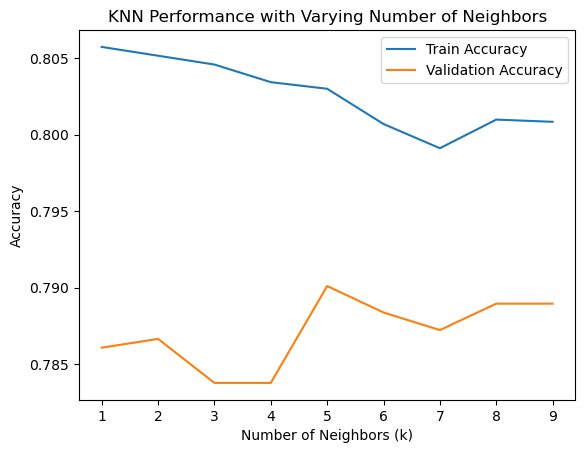

In [88]:
n_neighbors_range = range(1,10)  # Example range of n_neighbors values
train_accuracy = []
val_accuracy = []

for n_neighbors in n_neighbors_range:
    knn_clf = KNeighborsClassifier(n_neighbors=16,
                                   p=n_neighbors,
                                   weights='uniform')

    knn_clf.fit(X_train, y_train)
    
    y_train_pred = knn_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = knn_clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"n_neighbors: {n_neighbors}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(n_neighbors_range, train_accuracy, label='Train Accuracy')
plt.plot(n_neighbors_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance with Varying Number of Neighbors')
plt.legend()
plt.show()

In [89]:
knn_clf = KNeighborsClassifier(n_neighbors=16,
                                      p=5,
                                      weights='uniform')
evaluate_model(selected_X, y, knn_clf, "KNN")

KNN acc score: 0.7703928887877177


In [90]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    # 'max_samples': [0.8, 1],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'max_depth': 10,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.8065850870705304)

n_estimators: 20, Train Accuracy: 0.8074489502444636, Validation Accuracy: 0.7935595169637722
n_estimators: 30, Train Accuracy: 0.8127696289905091, Validation Accuracy: 0.7987349051178838
n_estimators: 40, Train Accuracy: 0.8081679608858211, Validation Accuracy: 0.8010350776308223
n_estimators: 50, Train Accuracy: 0.8067299396031061, Validation Accuracy: 0.7952846463484762
n_estimators: 60, Train Accuracy: 0.8106125970664366, Validation Accuracy: 0.7952846463484762
n_estimators: 70, Train Accuracy: 0.808455565142364, Validation Accuracy: 0.7975848188614146
n_estimators: 80, Train Accuracy: 0.8080241587575496, Validation Accuracy: 0.7918343875790684
n_estimators: 90, Train Accuracy: 0.8062985332182916, Validation Accuracy: 0.7981598619896493
n_estimators: 100, Train Accuracy: 0.8077365545010066, Validation Accuracy: 0.7947096032202415
n_estimators: 110, Train Accuracy: 0.8121944204774231, Validation Accuracy: 0.7964347326049454
n_estimators: 120, Train Accuracy: 0.8085993672706356, Vali

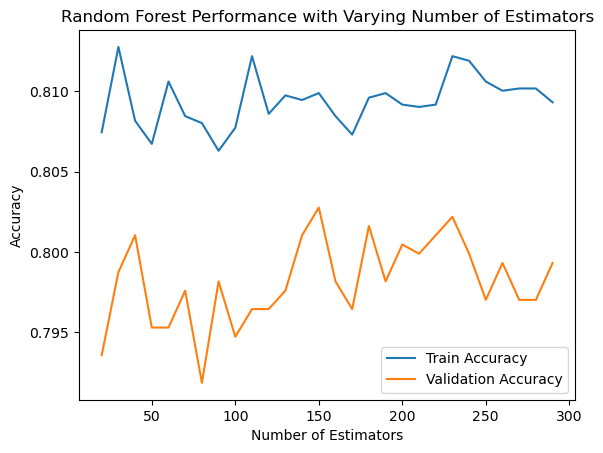

In [100]:
n_estimators_range = np.arange(20,300,10)  # Example range of n_estimators values
train_accuracy = []
val_accuracy = []

for n_estimators in n_estimators_range:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators,
                                    # criterion='gini',
                                    max_depth=7,
                                    min_samples_split=3,
                                    min_samples_leaf=8,
                                    max_features=0.2,
                                    bootstrap=True,
                                    )

    rf_clf.fit(X_train, y_train)
    
    y_train_pred = rf_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = rf_clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"n_estimators: {n_estimators}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(n_estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance with Varying Number of Estimators')
plt.legend()
plt.show()

In [102]:
rf_clf = RandomForestClassifier(n_estimators=150,
                                    # criterion='gini',
                                    max_depth=7,
                                    min_samples_split=3,
                                    min_samples_leaf=8,
                                    max_features=0.2,
                                    bootstrap=True,
                                )

evaluate_model(selected_X, y, rf_clf, "Random Forest")

Random Forest acc score: 0.7901788721610968


In [103]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'max_depth': 5,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.8085981308411215)

n_estimators: 5, Train Accuracy: 0.7392867414437734, Validation Accuracy: 0.7406555491661875
n_estimators: 10, Train Accuracy: 0.7684785734828875, Validation Accuracy: 0.7722829212190915
n_estimators: 15, Train Accuracy: 0.7897612884670693, Validation Accuracy: 0.7860839562967222
n_estimators: 20, Train Accuracy: 0.7888984756974403, Validation Accuracy: 0.7860839562967222
n_estimators: 25, Train Accuracy: 0.8014092608570607, Validation Accuracy: 0.7941345600920069
n_estimators: 30, Train Accuracy: 0.8037100949094047, Validation Accuracy: 0.7952846463484762
n_estimators: 35, Train Accuracy: 0.8106125970664366, Validation Accuracy: 0.80448533640023
n_estimators: 40, Train Accuracy: 0.8129134311187806, Validation Accuracy: 0.8021851638872916
n_estimators: 45, Train Accuracy: 0.8132010353753235, Validation Accuracy: 0.79700977573318
n_estimators: 50, Train Accuracy: 0.8077365545010066, Validation Accuracy: 0.7947096032202415
n_estimators: 55, Train Accuracy: 0.808455565142364, Validation A

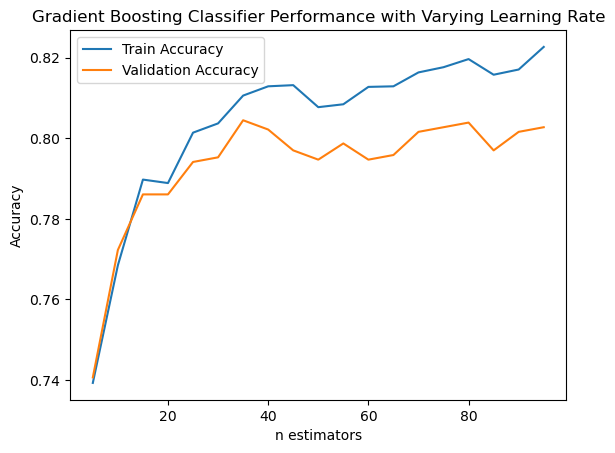

In [117]:
n_estimators_range = np.arange(5,100,5)  # Example range of learning_rate values
train_accuracy = []
val_accuracy = []

for n_estimators in n_estimators_range:
    gb_clf = GradientBoostingClassifier(max_depth=3,
                                        max_features="log2",
                                        min_samples_leaf=18,
                                        min_samples_split=26,
                                        n_estimators=n_estimators,
                                        learning_rate=0.2
                                        )
    gb_clf.fit(X_train, y_train)
    
    y_train_pred = gb_clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    y_val_pred = gb_clf.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracy.append(val_acc)
    
    print(f"n_estimators: {n_estimators}, Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

# Plotting
plt.plot(n_estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('n estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Classifier Performance with Varying Learning Rate')
plt.legend()
plt.show()

In [118]:
gb_clf = GradientBoostingClassifier(max_depth=3,
                                        max_features="log2",
                                        min_samples_leaf=18,
                                        min_samples_split=26,
                                        n_estimators=35,
                                        learning_rate=0.2
                                        )

evaluate_model(selected_X, y, gb_clf, "Gradient Boosting")

Gradient Boosting acc score: 0.7905233686542601


In [120]:
evaluate_model(selected_X, y, sgd_clf, "SGD")
# evaluate_model(selected_X, y, lr_clf, "Logistic Regression")
evaluate_model(selected_X, y, ridge_clf, "Ridge")
evaluate_model(selected_X, y, lasso_clf, "Lasso")
evaluate_model(selected_X, y, svc_rbf_clf, "SVC RBF")
evaluate_model(selected_X, y, svc_poly_clf, "SVC Poly")
evaluate_model(selected_X, y, svc_linear_clf, "SVC Linear")
# evaluate_model(selected_X, y, svc_sigmoid_clf, "SVC Sigmoid")
evaluate_model(selected_X, y, rf_clf, "Random Forest")
evaluate_model(selected_X, y, gb_clf, "Gradient Boosting")
evaluate_model(selected_X, y, nb_clf, "Naive Bayes")
evaluate_model(selected_X, y, knn_clf, "KNN")

SGD acc score: 0.7688962546759477
Ridge acc score: 0.7764872871794497
Lasso acc score: 0.7745311479488695
SVC RBF acc score: 0.7937445365939844
SVC Poly acc score: 0.7971952585741975
SVC Linear acc score: 0.7756832855674762
Random Forest acc score: 0.786957902740289
Gradient Boosting acc score: 0.7906381125880183
Naive Bayes acc score: 0.7313985459151093
KNN acc score: 0.7703928887877177


The svc rbf, svc poly, RF and GB work pretty well

In [122]:
selected_X.shape,X_test.shape

((8693, 33), (4277, 19))

In [137]:
gb_clf.fit(selected_X, y)
y_pred = gb_clf.predict(X_test)


In [138]:
y_pred_df = pd.DataFrame(y_pred, columns=["Transported"])
y_pred_df.value_counts()

Transported
True           2227
False          2050
Name: count, dtype: int64

In [128]:
def predict_to_file(X, model, raw_test_data, name):
    # Predicting
    model.fit(selected_X, y)
    y_pred = model.predict(X)
    
    # Creating DataFrame with predicted SalePrice
    result_df = pd.DataFrame({'Transported': y_pred}, columns=['Transported'])
    
    # Adding Id row from raw_test_data
    result_df['PassengerId'] = raw_test_data['PassengerId']
    
    # Reordering columns
    result_df = result_df[['PassengerId', 'Transported']]

    # Exporting to CSV
    result_df.to_csv(f'{name}_predict.csv', index=False)

In [139]:
# predict_to_file(X_test, sgd_clf, test_raw_df, "SGD")
# predict_to_file(X_test, lr_clf, test_raw_df, "LogisticRegression")
# predict_to_file(X_test, lasso_clf, test_raw_df, "Lasso")
# predict_to_file(X_test, svc_rbf_clf, test_raw_df, "SVC_RBF")
# predict_to_file(X_test, svc_poly_clf, test_raw_df, "SVC_Poly")
# predict_to_file(X_test, svc_linear_clf, test_raw_df, "SVC_Linear")
# predict_to_file(X_test, rf_clf, test_raw_df, "RandomForest")
predict_to_file(X_test, gb_clf, test_raw_df, "GradientBoosting")
